## Setting Up

In [1]:
home_dir = normalizePath("~")
relative_path = file.path("R programs")
full_path = file.path(home_dir, relative_path)
setwd(full_path)
getwd()

[1] "C:/Users/death-star/Documents/R programs"

## Sentiment problem
### High sentiment referes to bullish mindset of Investors


* Data visualizaton
* Training the model
* Testing the model 
* Evaluate out-of-sample performance model

**ABC** case study problem

In [3]:
library(car)
library(lmtest)
library(readxl)
library(sandwich)
library(moments)


In [4]:
Data = read_excel('week_5/ABC.xlsx')
head(Data)
dim(Data)


Date,Price,ABC,Sensex,DividendAnnounced,Sentiment,Nifty
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000-01-03,718.15,0.07992481,0.073772129,0,0.04893645,0.095816410
2000-01-04,712.90,-0.00731045,0.021562349,0,-0.05503706,0.009706008
2000-01-05,730.00,0.02398653,-0.024405346,0,0.01913459,-0.032213609
2000-01-06,788.35,0.07993151,0.012045921,0,0.08035507,0.011204936
2000-01-07,851.40,0.07997717,-0.001300371,0,0.09403754,-0.000397248
2000-01-10,919.50,0.07998591,0.019191132,1,0.01522908,0.030167565


[1] 5153    7

In [5]:
class(Data$Date)

[1] "POSIXct" "POSIXt"

Converting this POSIX to normal date variable

In [6]:
Data$Date = as.Date(Data$Date)
class(Data$Date)

[1] "Date"

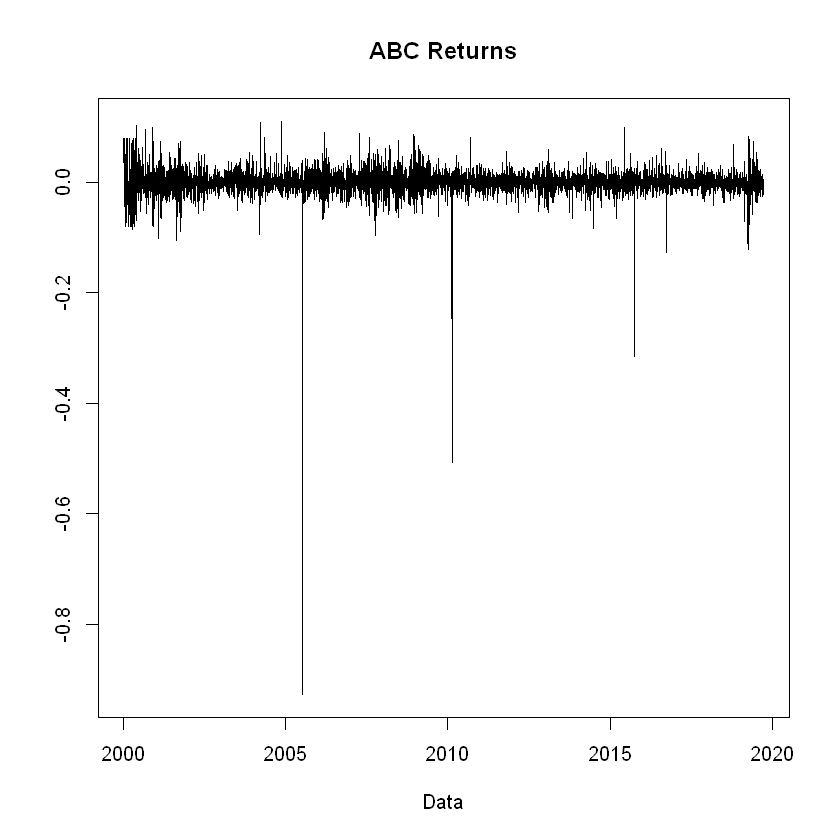

In [7]:
plot(Data$Date, Data$ABC , xlab="Data", ylab = "", main = "ABC Returns", type = 'l')

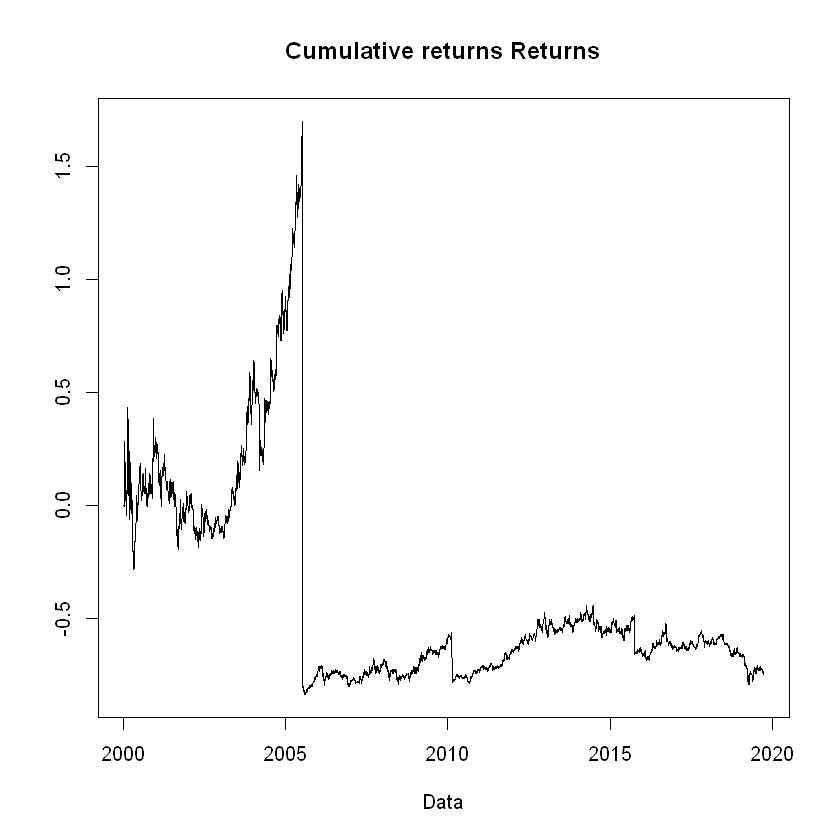

In [9]:
Data$CUM_Ret = Data$Price / Data$Price[1]-1
plot(Data$Date, Data$CUM_Ret , xlab="Data", ylab = "", main = "Cumulative returns Returns", type = 'l')

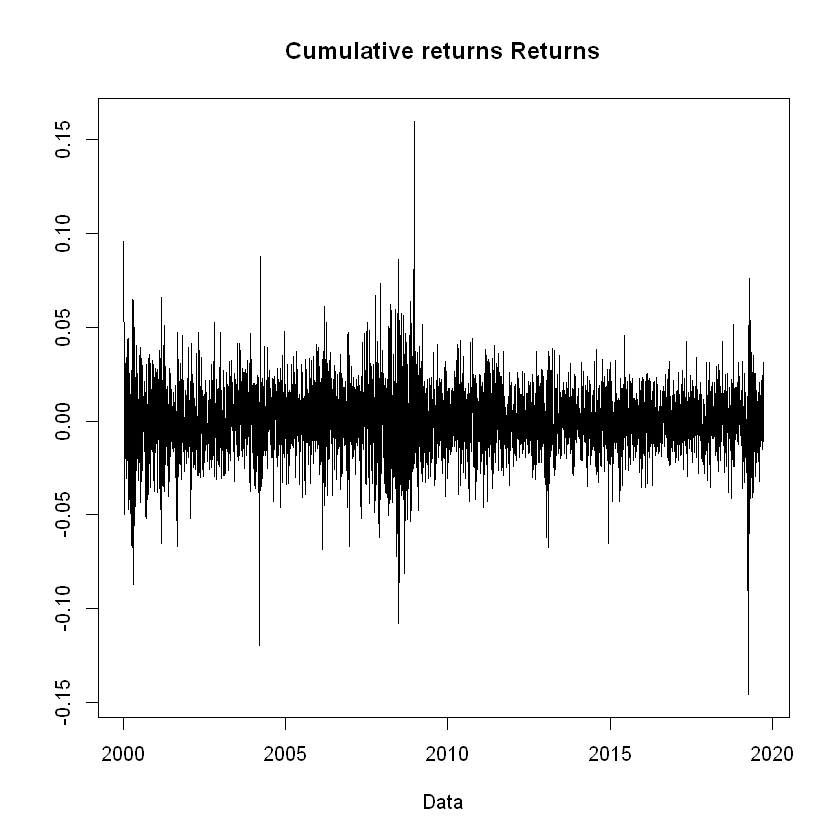

In [10]:
# Market or Nifty returns
plot(Data$Date, Data$Nifty , xlab="Data", ylab = "", main = "Cumulative returns Returns", type = 'l')

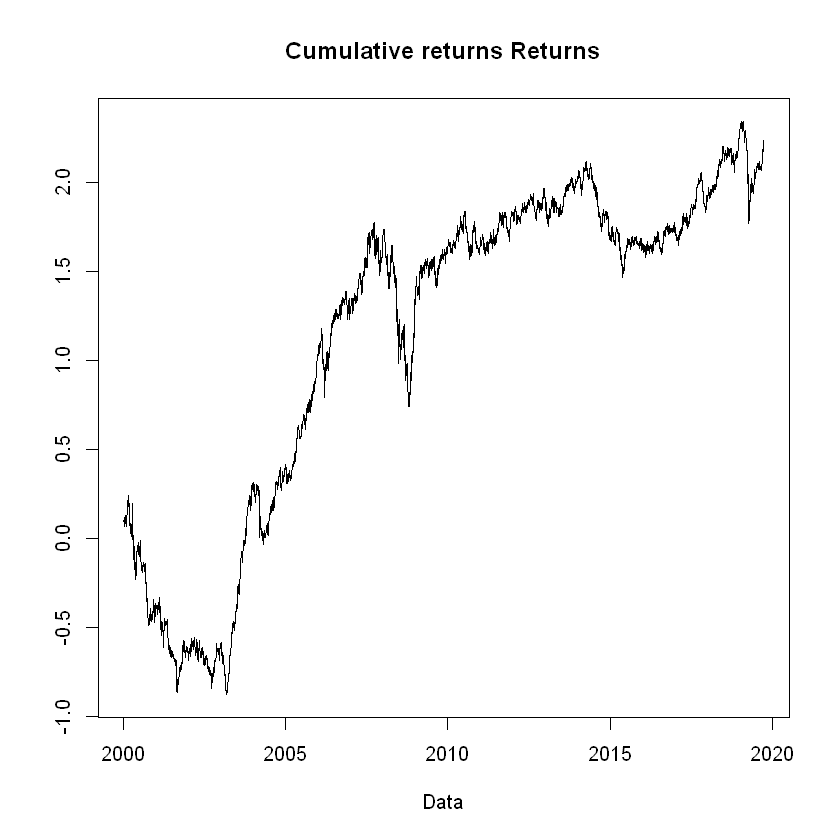

In [11]:
#Cumulative market returns
Data$Cum_Ret_Nifty = cumsum(Data$Nifty)
plot(Data$Date, Data$Cum_Ret_Nifty , xlab="Data", ylab = "", main = "Cumulative returns Returns", type = 'l')

### Basic Properties of data

In [12]:
summary(Data$ABC)

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.9273627 -0.0090724  0.0001761  0.0003167  0.0100360  0.1108470 

In [13]:
summary(Data$Nifty)

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.1458446 -0.0096267  0.0005979  0.0004322  0.0107338  0.1597033 

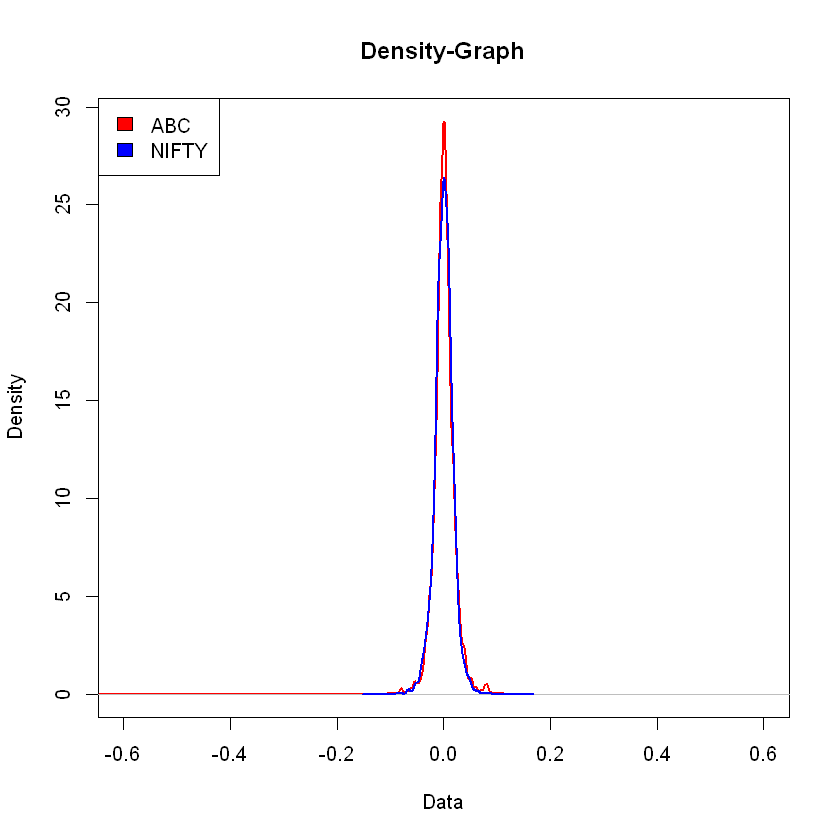

In [16]:
plot(density(Data$ABC), main= "Density-Graph", xlab = "Data", col = 'red', lwd = 2, lty =1, xlim =c(-0.6,0.6))
lines(density(Data$Nifty), col ="blue", lwd = 2)
legend("topleft",c("ABC", "NIFTY"), fill = c("red","blue"))
## ABS returns are skewed towards the left as we can see in the figure meanwhile NIFTY returns are Normal

### Normality and Stationrity of the data

In [17]:
skewness(Data$ABC)
skewness(Data$Nifty)

[1] -11.99669

[1] -0.1775945

In [18]:
agostino.test(Data$ABC)
agostino.test(Data$Nifty)


	D'Agostino skewness test

data:  Data$ABC
skew = -11.997, z = -81.159, p-value < 2.2e-16
alternative hypothesis: data have a skewness



	D'Agostino skewness test

data:  Data$Nifty
skew = -0.17759, z = -5.17203, p-value = 2.316e-07
alternative hypothesis: data have a skewness


In [19]:
kurtosis(Data$ABC)
kurtosis(Data$Nifty)

[1] 415.1945

[1] 7.319551

In [20]:
anscombe.test(Data$ABC)
anscombe.test(Data$Nifty)


	Anscombe-Glynn kurtosis test

data:  Data$ABC
kurt = 415.195, z = 50.333, p-value < 2.2e-16
alternative hypothesis: kurtosis is not equal to 3



	Anscombe-Glynn kurtosis test

data:  Data$Nifty
kurt = 7.3196, z = 22.5579, p-value < 2.2e-16
alternative hypothesis: kurtosis is not equal to 3


In [ ]:
jarque.test(Data$ABC)
jarque.test(Data$)